**Load the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [2]:
df = pd.read_csv('ObesityDataSet.csv')

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3,3,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


# **Exploratory Data Analysis**

**Identify the shape of dataset**

In [5]:
df.shape

(2111, 17)

**Get the list of columns**

In [6]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

**Get basic dataset information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

**Dataset visualization**

In [8]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [9]:
df[numerical_features].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [10]:
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


<ipython-input-11-c39ab4dba0e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="NObeyesdad", palette="Set2", edgecolor='black', order=df["NObeyesdad"].value_counts().index)


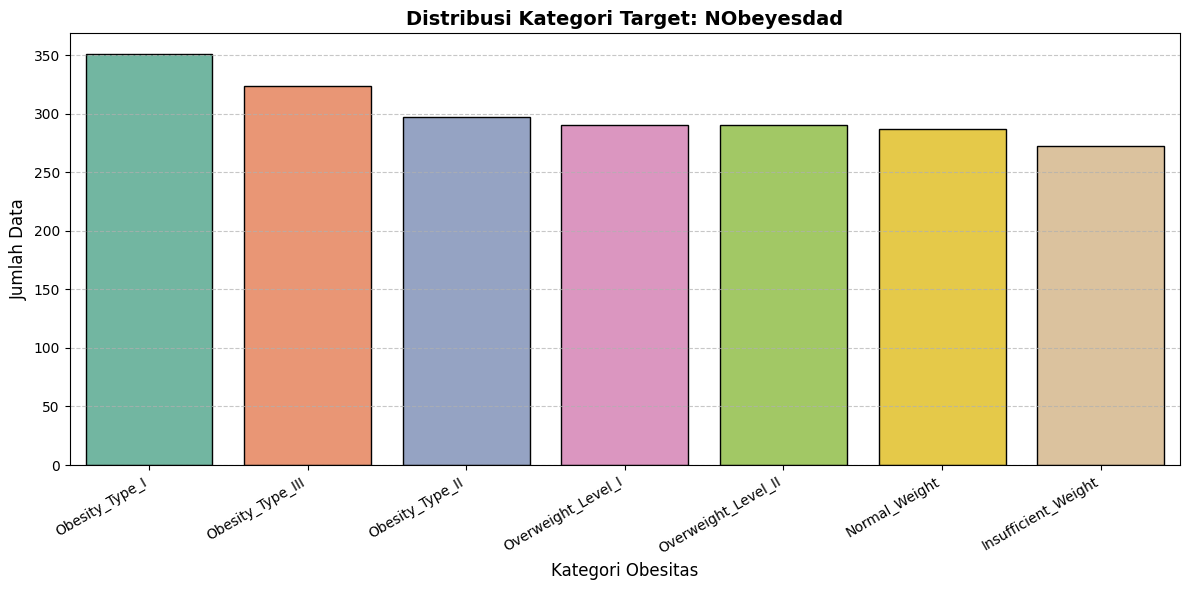

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="NObeyesdad", palette="Set2", edgecolor='black', order=df["NObeyesdad"].value_counts().index)
plt.xlabel("Kategori Obesitas", fontsize=12)
plt.ylabel("Jumlah Data", fontsize=12)
plt.title("Distribusi Kategori Target: NObeyesdad", fontsize=14, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**unique value**

In [12]:
for col in df.columns:
    print(f"Kolom: {col} - Jumlah Nilai Unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")
    print("-" * 40)

Kolom: Age - Jumlah Nilai Unik: 1394
Nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']
----------------------------------------
Kolom: Gender - Jumlah Nilai Unik: 3
Nilai unik: ['Female' 'Male' '?' nan]
----------------------------------------
Kolom: Height - Jumlah Nilai Unik: 1562
Nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']
----------------------------------------
Kolom: Weight - Jumlah Nilai Unik: 1518
Nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']
----------------------------------------
Kolom: CALC - Jumlah Nilai Unik: 5
Nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
----------------------------------------
Kolom: FAVC - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'yes' '?' nan]
----------------------------------------
Kolom: FCVC - Jumlah Nilai Unik: 808
Nilai unik: ['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 

**Identify missing values**

In [13]:
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [14]:
(df.isnull().sum()/(len(df)))*100

,0
Age,0.663193
Gender,0.426338
Height,0.568451
Weight,0.521080
CALC,0.236855
FAVC,0.521080
FCVC,0.378967
NCP,0.568451
SCC,0.473709
SMOKE,0.236855


**Identify duplicate entries/ rows**

In [15]:
df.shape

(2111, 17)

In [16]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 18


In [17]:
df[df.duplicated()]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21,Female,1.52,42,Sometimes,no,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
174,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
179,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
184,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
309,16,Female,1.66,58,no,no,2,1,no,no,1,no,0,1,Sometimes,Walking,Normal_Weight
460,18,Female,1.62,55,no,yes,2,3,no,no,1,yes,1,1,Frequently,Public_Transportation,Normal_Weight
663,21,Female,1.52,42,Sometimes,yes,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
763,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
764,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
824,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I


**Target class balance**

In [18]:
print(df["NObeyesdad"].value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


**Outlier**

<ipython-input-21-1946aaf7d3d3>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
<ipython-input-21-1946aaf7d3d3>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
<ipython-input-21-1946aaf7d3d3>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
<ipython-input-21-1946aaf7d3d3>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

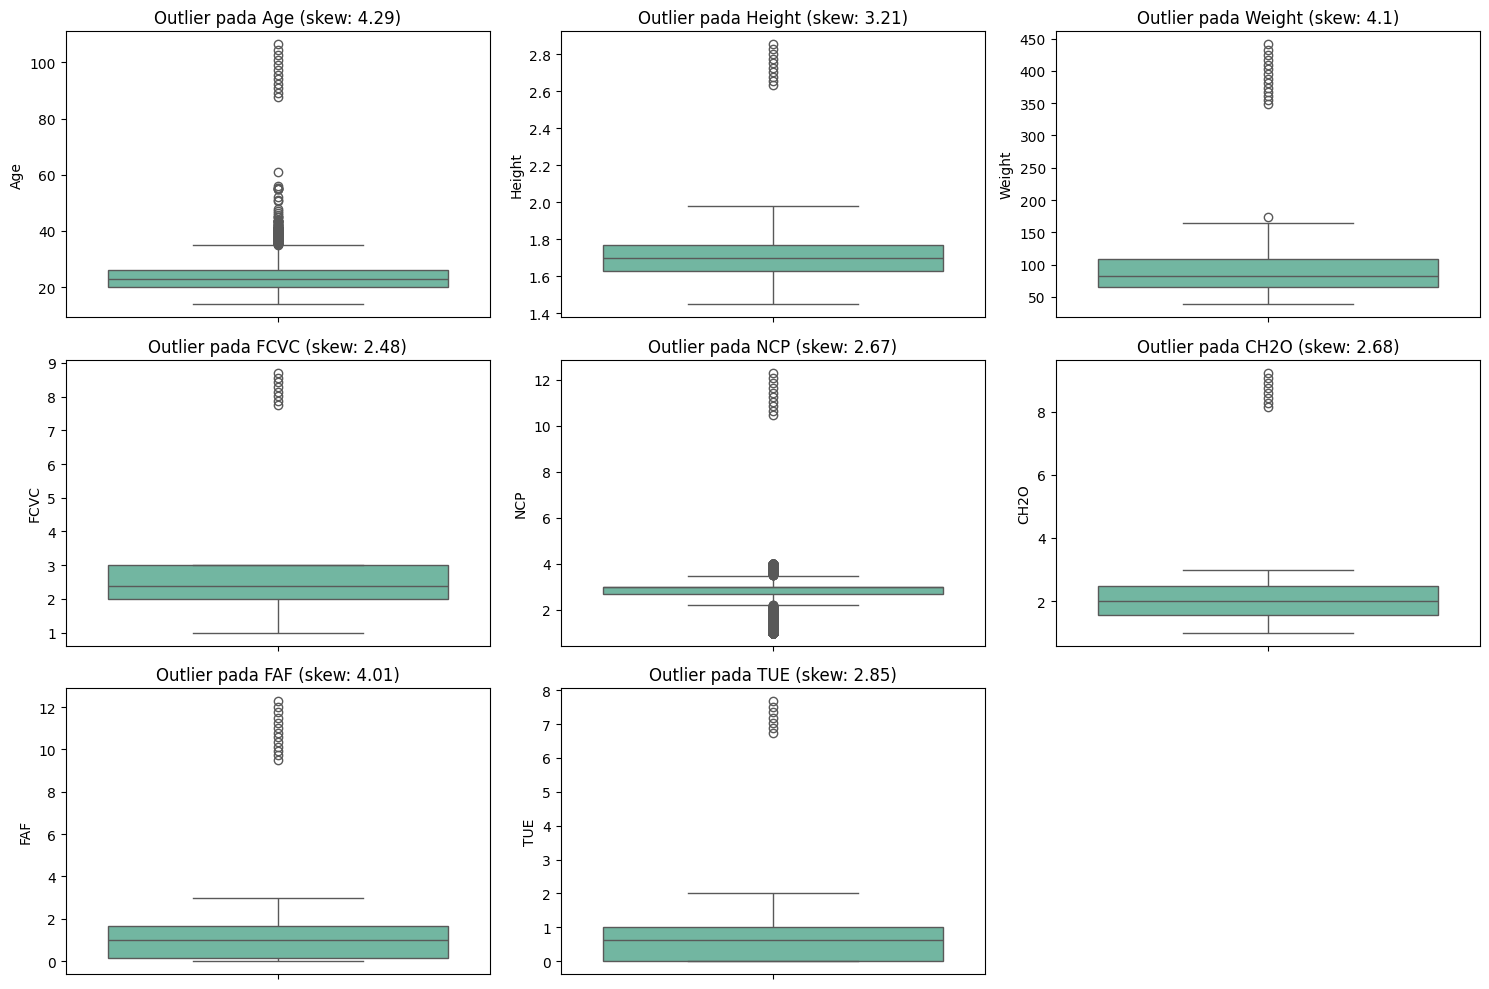

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('ObesityDataSet.csv')

# Define numerical features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Replace '?' with NaN in numerical columns and convert to numeric
for col in numerical_features:
    df[col] = df[col].replace('?', np.nan)
    df[col] = pd.to_numeric(df[col])

# Dataset visualization (Outlier plotting)
plt.figure(figsize=(15, 10))

max_plots = min(len(numerical_features), 9)  # Maksimal 9 subplot (3x3)
for i, col in enumerate(numerical_features[:max_plots], 1):
    plt.subplot(3, 3, i)
    # Use dropna() to handle NaN values when calculating skewness
    skewness = round(df[col].dropna().skew(skipna=True), 2)
    sns.boxplot(y=df[col], palette='Set2')
    plt.title(f'Outlier pada {col} (skew: {skewness})')
    plt.ylabel(col)

plt.tight_layout()
plt.show()